In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [7]:
## To view the full review
pd.set_option('display.max_colwidth', -1)

C:\Users\Subhadri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [8]:
redmi_note_5_pro = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Project/Redmi_Note_5_Pro.csv')
redmi_note_5_pro.head()

,Unnamed: 0,Review Header,Reviews,Ratings
0,0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0
1,1,Fabulous!,nice,5.0
2,2,Worth every penny,great picture effact,5.0
3,3,Terrific purchase,no words just Too Good,5.0
4,4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0


In [9]:
redmi_note_5_pro = redmi_note_5_pro.drop('Unnamed: 0', axis = 1)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0
1,Fabulous!,nice,5.0
2,Worth every penny,great picture effact,5.0
3,Terrific purchase,no words just Too Good,5.0
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0


In [10]:
redmi_note_5_pro.shape

(19870, 3)

In [11]:
redmi_note_5_pro['Ratings'].value_counts()

5.0    14038
4.0    3457 
1.0    1072 
3.0    909  
2.0    394  
Name: Ratings, dtype: int64

In [12]:
# Checking null values

redmi_note_5_pro.isnull().sum()

Review Header    0
Reviews          0
Ratings          0
dtype: int64

In [13]:
# Checking duplicate values

redmi_note_5_pro[redmi_note_5_pro.duplicated(['Review Header', 'Reviews'])]

,Review Header,Reviews,Ratings
930,Terrific,good,5.0
1017,Delightful,good,4.0
1036,Highly recommended,Good product,5.0
1085,Classy product,Good product,5.0
1138,Best in the market!,Excellent,5.0
...,...,...,...
19853,Perfect product!,good,5.0
19854,Does the job,nice,3.0
19856,Just wow!,good product,5.0
19862,Must buy!,good,5.0


In [14]:
redmi_note_5_pro[redmi_note_5_pro['Review Header'] == redmi_note_5_pro['Review Header'][4]]

,Review Header,Reviews,Ratings
3,Terrific purchase,no words just Too Good,5.0
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0
8,Terrific purchase,true value for money,5.0
61,Terrific purchase,awesome phone with awesome design...good built quality.camera is so nice.Thank you Redmi India.Thank you Flipkart.#loveredmi,5.0
69,Terrific purchase,best best best..... nothing to say,5.0
...,...,...,...
19769,Terrific purchase,awesome day,5.0
19773,Terrific purchase,awesome and good to use,5.0
19783,Terrific purchase,awesome cam,5.0
19808,Terrific purchase,Nice good,5.0


## Even though the Review Headers are same for some cases, the Reviews are not the same. So, I won't be deleting any duplicate values, else there will be loss of data.

### Insights:
- If the rating given by the customer is 1, 2 or 3, then sentiment is 0.
- If the rating given by the customer is 4 or 5, then sentiment is 1.

In [15]:
redmi_note_5_pro['Sentiment'] = redmi_note_5_pro['Ratings'].apply(lambda x:1 if x>3.0 else 0)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1
1,Fabulous!,nice,5.0,1
2,Worth every penny,great picture effact,5.0,1
3,Terrific purchase,no words just Too Good,5.0,1
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1


In [16]:
redmi_note_5_pro['Sentiment'].value_counts()

1    17495
0    2375 
Name: Sentiment, dtype: int64

### Combining all the reviews

In [17]:
combined_reviews1 = " ".join(redmi_note_5_pro['Reviews'].values)
#print(combined_reviews1)

### Preparing Word Cloud before cleaning the reviews

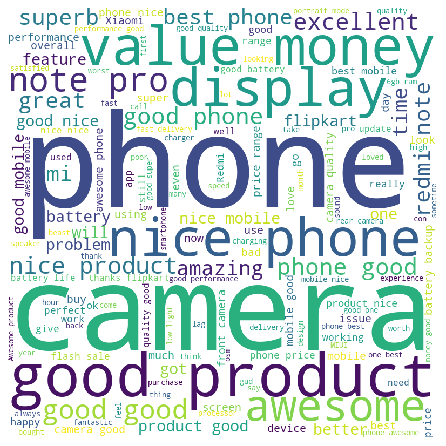

In [18]:
wc_before_cleaning = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).generate(combined_reviews1)
plt.figure(figsize = (12,6))
plt.imshow(wc_before_cleaning)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [19]:
all_words_before_cleaning = word_tokenize(combined_reviews1.lower())
#all_words_before_cleaning

In [20]:
fdist = FreqDist(all_words_before_cleaning)
fdist

FreqDist({'.': 8920, 'good': 7383, 'is': 7207, 'phone': 5662, 'the': 4867, ',': 4167, 'and': 4152, 'it': 3865, '...': 3691, 'i': 3584, ...})

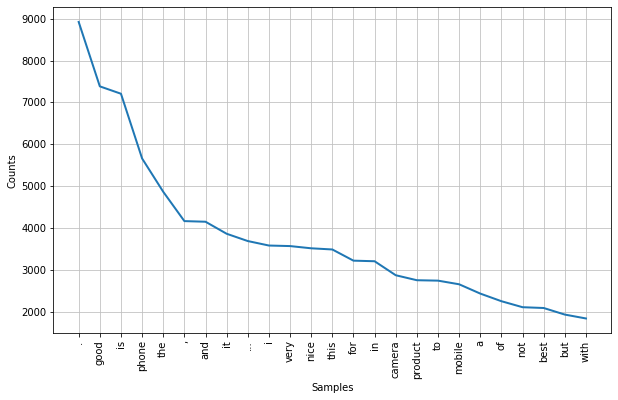

In [21]:
plt.figure(figsize = (10,6))
fdist.plot(25, cumulative = False)
plt.show()

In [22]:
words_list1 = []
for i in combined_reviews1.split():
    words_list1.append(i)
dictionary1 = {}
for j in words_list1:
    dictionary1[j] = dictionary1.get(j,0) + 1
series1 = pd.Series(dictionary1)
word_count_df1 = pd.DataFrame(series1).reset_index()
word_count_df1.head()

,index,0
0,It's,221
1,is,7039
2,very,2804
3,good,5129
4,phone.,379


In [23]:
word_count_df1 = word_count_df1.rename(columns = {'index': 'Words', 0: 'Frequency'})
word_count_df1.head()

,Words,Frequency
0,It's,221
1,is,7039
2,very,2804
3,good,5129
4,phone.,379


### Data Cleaning

In [24]:
stop_words = stopwords.words('english')
#print(stop_words)

In [25]:
stop_words_updated = stop_words + ['..', '...', 'will', 'would', 'can', 'could', 'should', 'phone', 
                                   'mobile', 'MI', 'redmi', 'note', 'pro', 'flipkart', 'product', "n't",
                                  '♥️', '👌', '✌️', '🤓', '😍', '😘', '✡️✡️✡️✡️✡️✡️✡️✡️✡️', '❤️',
                                  '♥️♥️', '🤔', '❤', '📱', '🔋', '👍', '👍👍👍', '😊', '💯', '💐', '💖', '😘',
                                  '😃', '👫', '🤙', '✖️', '➕', '😎', '😚', '😅', '📷', '🙏👐', '👇',
                                  '😐', '😢', '🤐', '😂🤣🤣😂👏', '😁', '💪', '😔', '🔥', '💞', '🌟',
                                  '😂😂😂', '❤❤❤❤❤❤❤', '👍👍👍👍👍', '😍😘😊', '😎😎😎😎😎😎']
updated_reviews = [word for word in all_words_before_cleaning if word not in stop_words_updated\
                  and word not in list(punctuation) and len(word) > 2]
#print(updated_reviews)

### I will be using Lemmatizer as it keeps all the meaningful words.

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
lemmatizer_words = [lemmatizer.lemmatize(i) for i in updated_reviews]
print(len(set(lemmatizer_words)))

13719


### Cleaning the reviews

In [28]:
def clean_review(text):
    tokens = word_tokenize(text.lower())
    lemma = [lemmatizer.lemmatize(term) for term in tokens
              if term not in stop_words_updated and
              term not in list(punctuation) and len(term) > 2]
    res = " ".join(lemma)
    return res

redmi_note_5_pro['Clean Review'] = redmi_note_5_pro['Reviews'].apply(clean_review)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment,Clean Review
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1,good recommend buy budget 10k 15k camera tooo fabulous screen also big love thank make budget also get great processor
1,Fabulous!,nice,5.0,1,nice
2,Worth every penny,great picture effact,5.0,1,great picture effact
3,Terrific purchase,no words just Too Good,5.0,1,word good
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1,best fone ever usethis 2nd device me..first second experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast


### Combining all the cleaned reviews

In [29]:
combined_reviews2 = " ".join(redmi_note_5_pro['Clean Review'].values)
#print(combined_reviews2)

### Preparing Word Cloud after cleaning the reviews

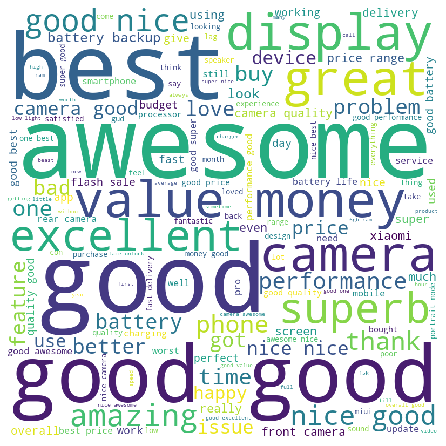

In [30]:
wc_after_cleaning = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).generate(combined_reviews2)
plt.figure(figsize = (12,6))
plt.imshow(wc_after_cleaning)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [31]:
all_words_after_cleaning = word_tokenize(combined_reviews2.lower())
#all_words_after_cleaning

In [32]:
fdist2 = FreqDist(all_words_after_cleaning)
fdist2

FreqDist({'good': 7385, 'nice': 3518, 'camera': 2941, 'best': 2093, 'awesome': 1782, 'battery': 1501, 'price': 1270, 'quality': 1218, 'one': 1043, 'super': 1028, ...})

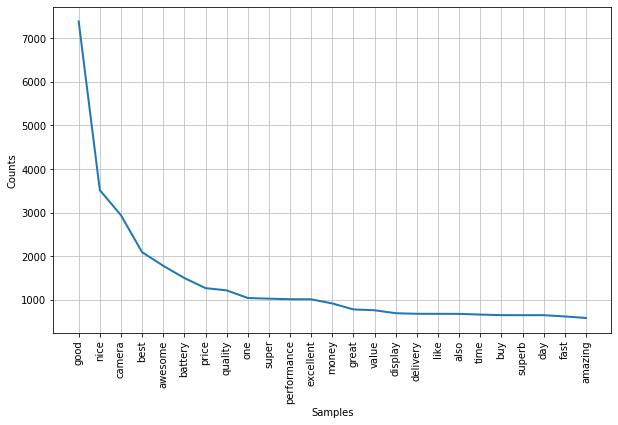

In [33]:
plt.figure(figsize = (10,6))
fdist2.plot(25, cumulative = False)
plt.show()

In [34]:
words_list2 = []
for i in combined_reviews2.split():
    words_list2.append(i)
dictionary2 = {}
for j in words_list2:
    dictionary2[j] = dictionary2.get(j,0) + 1
series2 = pd.Series(dictionary2)
word_count_df2 = pd.DataFrame(series2).reset_index()
word_count_df2.head()

,index,0
0,good,7385
1,recommend,95
2,buy,650
3,budget,394
4,10k,10


In [35]:
word_count_df2 = word_count_df2.rename(columns = {'index': 'Words', 0: 'Frequency'})
word_count_df2.head()

,Words,Frequency
0,good,7385
1,recommend,95
2,buy,650
3,budget,394
4,10k,10


In [36]:
stop_words_updated = set(stop_words_updated) - {'no', 'nor', 'not'}
#print(stop_words_updated)

### n-gram Analysis

In [37]:
count_vect_unigram = CountVectorizer(ngram_range = (1,1), max_features = 25)
unigram = count_vect_unigram.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect_unigram.get_feature_names())

['also', 'amazing', 'awesome', 'battery', 'best', 'buy', 'camera', 'day', 'delivery', 'display', 'excellent', 'fast', 'good', 'great', 'like', 'money', 'nice', 'one', 'performance', 'price', 'quality', 'super', 'superb', 'time', 'value']


In [38]:
DTM_unigram = pd.DataFrame(unigram.toarray(), columns = count_vect_unigram.get_feature_names())
DTM_unigram.head()

,also,amazing,awesome,battery,best,buy,camera,day,delivery,display,...,money,nice,one,performance,price,quality,super,superb,time,value
0,2,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,2,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [39]:
top_25_unigram = DTM_unigram.sum().sort_values(ascending = False)
top_25_unigram

good           7655
nice           3583
camera         3172
best           2190
awesome        1908
battery        1643
price          1330
quality        1268
performance    1106
one            1103
excellent      1073
super          1060
money          1003
great          834 
value          804 
display        772 
delivery       717 
also           705 
time           704 
superb         690 
like           688 
fast           665 
day            664 
buy            661 
amazing        622 
dtype: int64

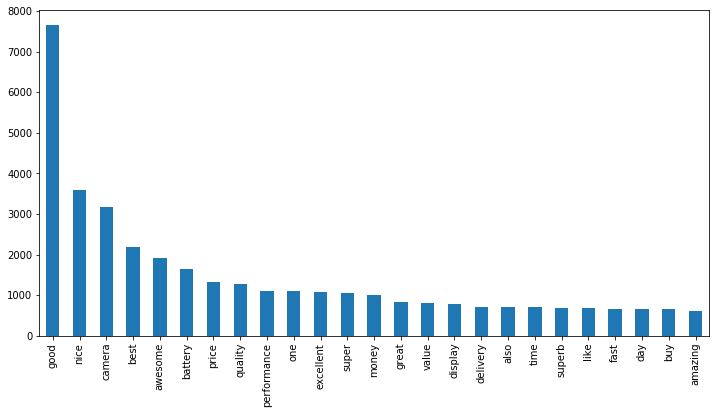

In [40]:
top_25_unigram.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (12,6))
plt.show()

In [41]:
count_vect_bigram = CountVectorizer(ngram_range = (2,2), max_features = 25)
bigram = count_vect_bigram.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect_bigram.get_feature_names())

['6gb ram', 'also good', 'battery backup', 'battery life', 'best price', 'camera good', 'camera quality', 'face unlock', 'fast delivery', 'flash sale', 'front camera', 'good battery', 'good camera', 'good performance', 'good price', 'good quality', 'low light', 'nice camera', 'one best', 'performance good', 'portrait mode', 'price range', 'quality good', 'rear camera', 'value money']


In [42]:
DTM_bigram = pd.DataFrame(bigram.toarray(), columns = count_vect_bigram.get_feature_names())
DTM_bigram.head()

,6gb ram,also good,battery backup,battery life,best price,camera good,camera quality,face unlock,fast delivery,flash sale,...,good quality,low light,nice camera,one best,performance good,portrait mode,price range,quality good,rear camera,value money
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
top_25_bigram = DTM_bigram.sum().sort_values(ascending = False)
top_25_bigram

value money         715
battery backup      328
camera quality      324
camera good         295
front camera        294
price range         281
good camera         234
flash sale          207
battery life        197
good battery        188
rear camera         176
best price          176
good quality        163
good price          161
fast delivery       160
good performance    157
also good           157
portrait mode       142
quality good        142
nice camera         138
one best            138
6gb ram             131
low light           130
performance good    124
face unlock         111
dtype: int64

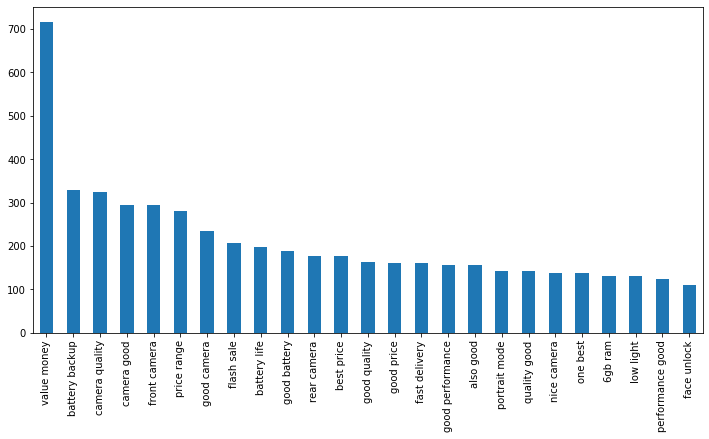

In [44]:
top_25_bigram.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (12,6))
plt.show()

In [45]:
count_vect_trigram = CountVectorizer(ngram_range = (3,3), max_features = 25)
trigram = count_vect_trigram.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect_trigram.get_feature_names())

['18 aspect ratio', '4000 mah battery', 'asus zenfone max', 'awesome value money', 'bad bad bad', 'battery backup good', 'battery life good', 'best price range', 'best value money', 'camera also good', 'camera good battery', 'camera quality good', 'finger print sensor', 'front camera good', 'good battery back', 'good battery backup', 'good battery life', 'good camera good', 'good camera quality', 'good price range', 'good value money', 'hybrid sim slot', 'nice value money', 'rear camera good', 'super super super']


In [46]:
DTM_trigram = pd.DataFrame(trigram.toarray(), columns = count_vect_trigram.get_feature_names())
DTM_trigram.head()

,18 aspect ratio,4000 mah battery,asus zenfone max,awesome value money,bad bad bad,battery backup good,battery life good,best price range,best value money,camera also good,...,good battery backup,good battery life,good camera good,good camera quality,good price range,good value money,hybrid sim slot,nice value money,rear camera good,super super super
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
top_25_trigram = DTM_trigram.sum().sort_values(ascending = False)
top_25_trigram

good value money       75
best price range       62
battery backup good    58
good battery backup    58
camera quality good    55
bad bad bad            44
good price range       40
front camera good      39
nice value money       34
good camera quality    32
hybrid sim slot        31
camera good battery    31
good battery life      29
4000 mah battery       28
best value money       27
battery life good      26
good camera good       24
camera also good       23
super super super      21
asus zenfone max       21
rear camera good       20
awesome value money    20
finger print sensor    19
good battery back      19
18 aspect ratio        19
dtype: int64

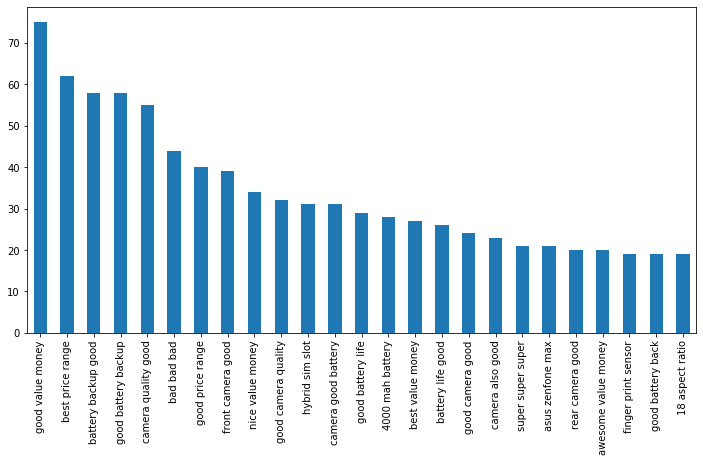

In [48]:
top_25_trigram.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (12,6))
plt.show()

### Sentiment Analysis

In [49]:
afinn = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Unstructured Data Analysis/Text Analytics/AFINN-111.txt', \
                    sep = '\t', header = None)
afinn.head()

,0,1
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [50]:
afinn.columns = ['Term', 'Sentiment Score']
afinn.head()

,Term,Sentiment Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [51]:
term_scores = dict(afinn.values)
#print(term_scores)

### Strategy 1: Sentiment Prediction

In [52]:
def get_sentiment_score(text):
    score = 0
    token = word_tokenize(text.lower())
    for i in token:
        score += term_scores.get(i,0)
    return score

redmi_note_5_pro['Sentiment Score'] = redmi_note_5_pro['Clean Review'].apply(get_sentiment_score)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1,good recommend buy budget 10k 15k camera tooo fabulous screen also big love thank make budget also get great processor,18
1,Fabulous!,nice,5.0,1,nice,3
2,Worth every penny,great picture effact,5.0,1,great picture effact,3
3,Terrific purchase,no words just Too Good,5.0,1,word good,3
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1,best fone ever usethis 2nd device me..first second experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast,-1


In [53]:
print(redmi_note_5_pro['Sentiment Score'].min())
print(redmi_note_5_pro['Sentiment Score'].max())

-96
117


In [54]:
redmi_note_5_pro['Sentiment Prediction'] = redmi_note_5_pro['Sentiment Score'].apply (lambda x:1 if x>0 else 0)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score,Sentiment Prediction
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1,good recommend buy budget 10k 15k camera tooo fabulous screen also big love thank make budget also get great processor,18,1
1,Fabulous!,nice,5.0,1,nice,3,1
2,Worth every penny,great picture effact,5.0,1,great picture effact,3,1
3,Terrific purchase,no words just Too Good,5.0,1,word good,3,1
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1,best fone ever usethis 2nd device me..first second experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast,-1,0


In [55]:
redmi_note_5_pro['Sentiment Prediction'].value_counts()

1    16081
0    3789 
Name: Sentiment Prediction, dtype: int64

In [56]:
accuracy_score(redmi_note_5_pro['Sentiment'], redmi_note_5_pro['Sentiment Prediction']) * 100

82.99949672873679

### Strategy 2: Vader

In [57]:
analyzer = SentimentIntensityAnalyzer()

In [58]:
def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

redmi_note_5_pro['Vader Score'] = redmi_note_5_pro['Reviews'].apply(get_vader_score)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score,Sentiment Prediction,Vader Score
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1,good recommend buy budget 10k 15k camera tooo fabulous screen also big love thank make budget also get great processor,18,1,0.9646
1,Fabulous!,nice,5.0,1,nice,3,1,0.4215
2,Worth every penny,great picture effact,5.0,1,great picture effact,3,1,0.6249
3,Terrific purchase,no words just Too Good,5.0,1,word good,3,1,0.1779
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1,best fone ever usethis 2nd device me..first second experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast,-1,0,0.6253


In [59]:
print(redmi_note_5_pro['Vader Score'].min())
print(redmi_note_5_pro['Vader Score'].max())

-0.9993
0.9992


In [60]:
redmi_note_5_pro['Vader Prediction'] = redmi_note_5_pro['Vader Score'].apply (lambda x:1 if x>0 else 0)
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score,Sentiment Prediction,Vader Score,Vader Prediction
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1,good recommend buy budget 10k 15k camera tooo fabulous screen also big love thank make budget also get great processor,18,1,0.9646,1
1,Fabulous!,nice,5.0,1,nice,3,1,0.4215,1
2,Worth every penny,great picture effact,5.0,1,great picture effact,3,1,0.6249,1
3,Terrific purchase,no words just Too Good,5.0,1,word good,3,1,0.1779,1
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1,best fone ever usethis 2nd device me..first second experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast,-1,0,0.6253,1


In [61]:
redmi_note_5_pro['Vader Prediction'].value_counts()

1    16047
0    3823 
Name: Vader Prediction, dtype: int64

In [62]:
accuracy_score(redmi_note_5_pro['Sentiment'], redmi_note_5_pro['Vader Prediction']) * 100

84.45898339204831

In [63]:
label = []
for i in redmi_note_5_pro['Vader Score']:
    if i >= -1 and i < -0.6:
        label.append('Very bad')
    elif i >= -0.6 and i < -0.2:
        label.append('Bad')
    elif i >= -0.2 and i < 0.2:
        label.append('Neutral')
    elif i >= 0.2 and i < 0.6:
        label.append('Good')
    else:
        label.append('Very good')
        
redmi_note_5_pro['Vader Label'] = label
redmi_note_5_pro.head()

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score,Sentiment Prediction,Vader Score,Vader Prediction,Vader Label
0,Must buy!,It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big. I love this phone. Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸,5.0,1,good recommend buy budget 10k 15k camera tooo fabulous screen also big love thank make budget also get great processor,18,1,0.9646,1,Very good
1,Fabulous!,nice,5.0,1,nice,3,1,0.4215,1,Good
2,Worth every penny,great picture effact,5.0,1,great picture effact,3,1,0.6249,1,Very good
3,Terrific purchase,no words just Too Good,5.0,1,word good,3,1,0.1779,1,Neutral
4,Terrific purchase,"best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast",5.0,1,best fone ever usethis 2nd device me..first second experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast,-1,0,0.6253,1,Very good


In [64]:
redmi_note_5_pro['Vader Label'].value_counts()

Good         9557
Very good    6269
Neutral      2524
Bad          1022
Very bad     498 
Name: Vader Label, dtype: int64

### Strategy 3: Model Building

In [65]:
x = redmi_note_5_pro['Clean Review']
y = redmi_note_5_pro['Sentiment']

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

In [68]:
x_train_cv = count_vect.fit_transform(x_train)
x_test_cv = count_vect.transform(x_test)
print(x_train_cv.shape, x_test_cv.shape)

(15896, 8084) (3974, 8084)


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [70]:
x_train_tv = tfidf_vect.fit_transform(x_train)
x_test_tv = tfidf_vect.transform(x_test)
print(x_train_tv.shape, x_test_tv.shape)

(15896, 8084) (3974, 8084)


#### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

#### Logistic Regression using Count Vectorizer

In [72]:
LogReg.fit(x_train_cv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred_cv = LogReg.predict(x_test_cv)

In [74]:
LogReg_accuracy_cv = accuracy_score(y_test, y_pred_cv) * 100
print('Accuracy:', LogReg_accuracy_cv)

Accuracy: 91.99798691494716


In [75]:
cm1 = confusion_matrix(y_test, y_pred_cv)
print('Confusion Matrix:', cm1, sep = '\n')

Confusion Matrix:
[[ 240  251]
 [  67 3416]]


#### Logistic Regression using TFIDF Vectorizer

In [76]:
LogReg.fit(x_train_tv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred_tv = LogReg.predict(x_test_tv)

In [78]:
LogReg_accuracy_tv = accuracy_score(y_test, y_pred_tv) * 100
print('Accuracy:', LogReg_accuracy_tv)

Accuracy: 91.39406139909411


In [79]:
cm2 = confusion_matrix(y_test, y_pred_tv)
print('Confusion Matrix:', cm2, sep = '\n')

Confusion Matrix:
[[ 189  302]
 [  40 3443]]


#### Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#### Gaussian Naive Bayes using Count Vectorizer

In [81]:
gnb.fit(x_train_cv.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
y_pred_cv = gnb.predict(x_test_cv.toarray())

In [83]:
gnb_accuracy_cv = accuracy_score(y_test, y_pred_cv) * 100
print('Accuracy:', gnb_accuracy_cv)

Accuracy: 24.383492702566684


In [84]:
cm3 = confusion_matrix(y_test, y_pred_cv)
print('Confusion Matrix:', cm3, sep = '\n')

Confusion Matrix:
[[ 407   84]
 [2921  562]]


#### Gaussian Naive Bayes using TFIDF Vectorizer

In [85]:
gnb.fit(x_train_tv.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
y_pred_tv = gnb.predict(x_test_tv.toarray())

In [87]:
gnb_accuracy_tv = accuracy_score(y_test, y_pred_tv) * 100
print('Accuracy:', gnb_accuracy_tv)

Accuracy: 25.893306492199297


In [88]:
cm4 = confusion_matrix(y_test, y_pred_tv)
print('Confusion Matrix:', cm4, sep = '\n')

Confusion Matrix:
[[ 400   91]
 [2854  629]]


### Clustering

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(max_features=150)

In [90]:
X = tfidfvectorizer.fit_transform(redmi_note_5_pro['Clean Review'])

In [91]:
from sklearn.cluster import KMeans 

In [92]:
clusters = 6
km = KMeans(n_clusters = clusters, random_state = 0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [93]:
pred_cluster = km.predict(X)
redmi_note_5_pro['Cluster Predicted'] = pred_cluster
redmi_note_5_pro['Cluster Predicted'].value_counts()

1    10997
2    3313 
0    2481 
4    1275 
5    1004 
3    800  
Name: Cluster Predicted, dtype: int64

In [94]:
pred_cluster.shape

(19870,)

In [95]:
km.cluster_centers_.shape

(6, 150)

In [96]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind])

Top 5 terms per cluster:
Cluster 0:
 nice
 camera
 good
 one
 product
Cluster 1:
 good
 excellent
 camera
 money
 superb
Cluster 2:
 good
 camera
 delivery
 battery
 price
Cluster 3:
 super
 camera
 nice
 good
 quality
Cluster 4:
 best
 price
 range
 camera
 ever
Cluster 5:
 awesome
 camera
 price
 performance
 good


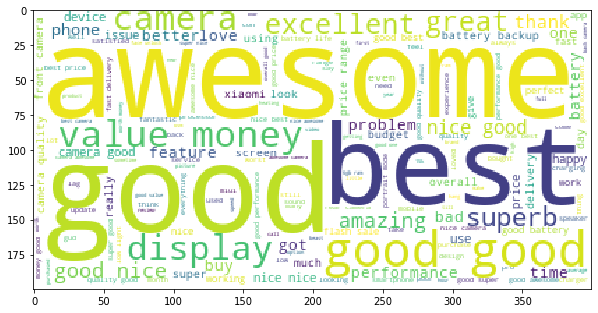

In [97]:
cluster0 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 0]
text0 = ' '.join(redmi_note_5_pro['Clean Review'])
wc0 = WordCloud(background_color = 'white').generate(text0)
plt.figure(figsize = (10,6))
plt.imshow(wc0)

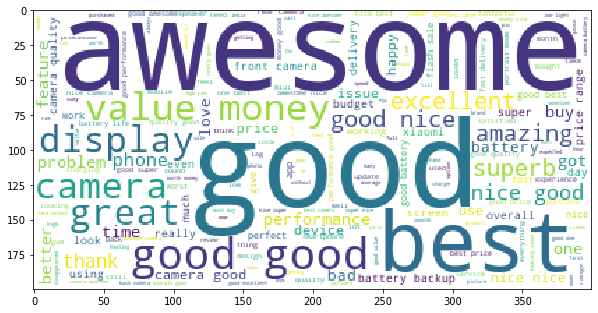

In [98]:
cluster1 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 1]
text1 = ' '.join(redmi_note_5_pro['Clean Review'])
wc1 = WordCloud(background_color = 'white').generate(text1)
plt.figure(figsize = (10,6))
plt.imshow(wc1)

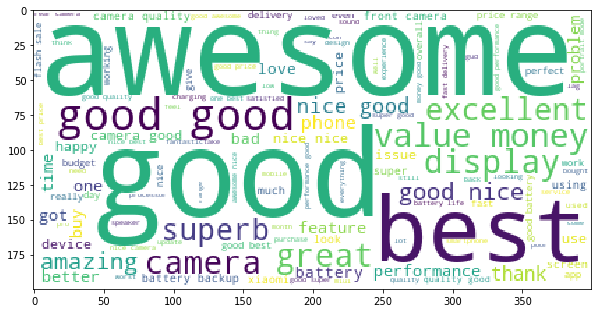

In [99]:
cluster2 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 2]
text2 = ' '.join(redmi_note_5_pro['Clean Review'])
wc2 = WordCloud(background_color = 'white').generate(text2)
plt.figure(figsize = (10,6))
plt.imshow(wc2)

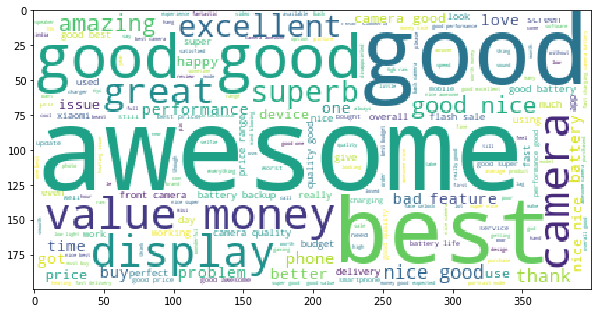

In [100]:
cluster3 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 3]
text3 = ' '.join(redmi_note_5_pro['Clean Review'])
wc3 = WordCloud(background_color = 'white').generate(text3)
plt.figure(figsize = (10,6))
plt.imshow(wc3)

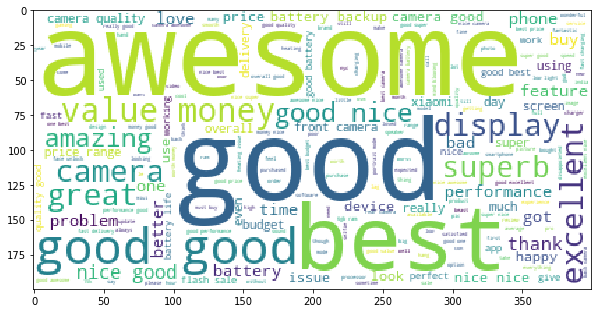

In [101]:
cluster4 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 4]
text4 = ' '.join(redmi_note_5_pro['Clean Review'])
wc4 = WordCloud(background_color = 'white').generate(text4)
plt.figure(figsize = (10,6))
plt.imshow(wc4)

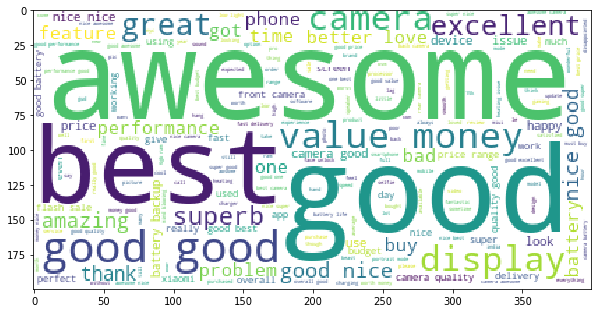

In [102]:
cluster5 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 5]
text5 = ' '.join(redmi_note_5_pro['Clean Review'])
wc5 = WordCloud(background_color = 'white').generate(text5)
plt.figure(figsize = (10,6))
plt.imshow(wc5)

### Cosine Similarity

In [103]:
tfidf = TfidfVectorizer(stop_words = 'english')
X = tfidf.fit_transform(redmi_note_5_pro['Clean Review'])

In [104]:
df_tfidf = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names())
df_tfidf.head()

,00,000,000mah,000phone,000rs,00am,00pm,01,02,03,...,zenofone,zenphone,zero,zindagi,zoom,zoomed,zooming,zot,αωѕσмє,ρяσ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
redmi_note_5_pro[redmi_note_5_pro['Sentiment'] == 0]

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score,Sentiment Prediction,Vader Score,Vader Prediction,Vader Label,Cluster Predicted
70,Bluffing the Customer with 10 Days Return Policy,"Sent me a defective handset which is having heating & battery draining issue, my handset reaching 45 to 48c heat and battery is getting drained with in 6 to 7 hours of minimum usage when i have reported the issue they are ready to time pass on it rather than solving it. The Technical guys who visited my house spent 5 min of time and play some Youtube videos and decides that the handset is working fine they don't use any tools they don't run any diagnostics to check the issue and they will be ready to close the case by showing that technical person has helped to solve the issue. After killing 10 days when i have reported the same thing they have come up with an answer that your 10 days time has passed and your are not eligible.",1.0,0,sent defective handset heating battery draining issue handset reaching 48c heat battery getting drained hour minimum usage reported issue ready time pas rather solving technical guy visited house spent min time play youtube video decides handset working fine use tool run diagnostics check issue ready close case showing technical person helped solve issue killing day reported thing come answer day time passed eligible,0,0,0.3400,1,Good,1
75,flipkart fooling customers,Seller cancels order after receiving payment after putting so much effort and wasting time on their flash sale they simply cancel your order and then you dont know when you wil get your money back.,1.0,0,seller cancel order receiving payment putting much effort wasting time flash sale simply cancel order dont know wil get money back,-4,0,-0.6808,0,Very bad,1
118,Absolute rubbish!,"After many attempts to purchase a Redmi note 5 pro in flash sales, I finally got a chance to buy one on 6th July as a gift to my relative.turns out that the phone has a defective selfy camera. and till date even after multiple verifications by flipkart technicians replacement is not done. Sick and tired of flipkart service.this is the status of affairs for purchasing a flipkart assured product",1.0,0,many attempt purchase flash sale finally got chance buy one 6th july gift relative.turns defective selfy camera till date even multiple verification technician replacement done sick tired service.this status affair purchasing assured,0,0,0.5109,1,Good,1
126,dont update softwre.camera battery become very por,super camera..but dont update software..i update software then camera become poor. afrer i update my phone camera work like 5 mp camera...poor piccs battery back up after software update become poor ...dont update..,1.0,0,super camera..but dont update software..i update software camera become poor afrer update camera work like camera poor piccs battery back software update become poor dont update..,-1,0,0.0516,1,Neutral,1
130,Unsatisfactory,"This much hype for this phone is too much. The time where company used to wait for customer is long gone, the so called new marketing strategy of making people to wait for product is becoming a trend. waiting for almost three months to book this product. After so many attempts to get hold of this device, finally I got it in my hand. But the feeling is more or less usual; holding a regular phone with usual display. don't expect anything remarkably fascinating out here.",1.0,0,much hype much time company used wait customer long gone called new marketing strategy making people wait becoming trend waiting almost three month book many attempt get hold device finally got hand feeling le usual holding regular usual display expect anything remarkably fascinating,4,1,0.8173,1,Very good,1
...,...,...,...,...,...,...,...,...,...,...,...
19823,Fair,Good product and received on time.,3.0,0,good received time,3,1,0.4404,1,Good,1
19829,Fair,camera clearity is very very bad (faltu) as compared with Lenovo Z2 Plus and MI A1,3.0,0,camera cle

In [106]:
redmi_note_5_pro['Clean Review'][126]

'super camera..but dont update software..i update software camera become poor afrer update camera work like camera poor piccs battery back software update become poor dont update..'

#### For the above review, getting the top 5 similar reviews.

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [108]:
cs = cosine_similarity(df_tfidf)

In [109]:
top_5_similar_reviews = cs[126].argsort()[::-1][1:6]
top_5_similar_reviews

array([ 3221,  8718,  2132, 18561,  1627], dtype=int64)

In [110]:
for i in top_5_similar_reviews:
    print('Review in', i, ':', redmi_note_5_pro['Clean Review'][i])

Review in 3221 : good updating camera performance poor update
Review in 8718 : awesome update
Review in 2132 : camera poor
Review in 18561 : battery back camera poor
Review in 1627 : 5pro bad update update camera clarty poor lot issue observed


#### For the review with the least polarity score, get the top 5 similar reviews.

In [111]:
redmi_note_5_pro['Vader Score'].min()

-0.9993

In [112]:
redmi_note_5_pro[redmi_note_5_pro['Vader Score'] == -0.9993]

,Review Header,Reviews,Ratings,Sentiment,Clean Review,Sentiment Score,Sentiment Prediction,Vader Score,Vader Prediction,Vader Label,Cluster Predicted
10221,Absolute rubbish!,very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad Quality,1.0,0,bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad quality,-96,0,-0.9993,0,Very bad,1


In [113]:
redmi_note_5_pro['Clean Review'][10221]

'bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad quality'

In [114]:
top_5_worst_reviews = cs[10221].argsort()[::-1][1:6]
top_5_worst_reviews

array([ 8728, 14813, 17088,  9093, 14131], dtype=int64)

In [115]:
for i in top_5_worst_reviews:
    print('Review in', i, ':', redmi_note_5_pro['Clean Review'][i])

Review in 8728 : bad
Review in 14813 : bad
Review in 17088 : bad
Review in 9093 : bad
Review in 14131 : bad


#### Top 5 associated words

In [116]:
def get_associated_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending = False)
    associated_words = cos_vals.drop(input_word).head()
    return associated_words

sim_mat = cosine_similarity(df_tfidf.T)
sim_mat = pd.DataFrame(sim_mat, columns = df_tfidf.columns, index = df_tfidf.columns) 

In [117]:
get_associated_words('camera', sim_mat)

quality    0.223328
battery    0.215075
rear       0.198617
display    0.136857
selfie     0.127735
Name: camera, dtype: float64

#### Using the vader labels to build a multi-class classification model to predict the accuracy of a customer review.

In [118]:
redmi_note_5_pro['Vader Label'].unique()

array(['Very good', 'Good', 'Neutral', 'Bad', 'Very bad'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [120]:
redmi_note_5_pro['Vader Label (le)'] = le.fit_transform(redmi_note_5_pro['Vader Label'])
#redmi_note_5_pro.head()

In [121]:
x = redmi_note_5_pro['Clean Review']
y = redmi_note_5_pro['Sentiment']

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

In [124]:
x_train_cv = count_vect.fit_transform(x_train)
x_test_cv = count_vect.transform(x_test)
print(x_train_cv.shape, x_test_cv.shape)

(15896, 8084) (3974, 8084)


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [126]:
x_train_tv = tfidf_vect.fit_transform(x_train)
x_test_tv = tfidf_vect.transform(x_test)
print(x_train_tv.shape, x_test_tv.shape)

(15896, 8084) (3974, 8084)


### Multinomial Naive Bayes

In [127]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

#### Mutinomial Naive Bayes using Count Vectorizer

In [128]:
mnb.fit(x_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [129]:
y_pred_cv = mnb.predict(x_test_cv)

In [130]:
mnb_accuracy_cv = accuracy_score(y_test, y_pred_cv) * 100
print('Accuracy:', mnb_accuracy_cv)

Accuracy: 91.59536990437846


#### Mutinomial Naive Bayes using TFIDF Vectorizer

In [131]:
mnb.fit(x_train_tv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [132]:
y_pred_tv = mnb.predict(x_test_tv)

In [133]:
mnb_accuracy_tv = accuracy_score(y_test, y_pred_tv) * 100
print('Accuracy:', mnb_accuracy_tv)

Accuracy: 89.45646703573226


#### Find customer concern areas - the top 25 bigrams which includes the below negative words indicating the customer concern areas: 'poor', 'waste', 'bad', 'defective', 'disgusting', 'worst', 'horrible', 'unexpectedly', 'slow'.

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range = (2,2), max_features = 10000)
bigrams = count_vect.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect.get_feature_names())

['000mah battery', '06 2018', '10 00am', '10 10', '10 10and', '10 10back', '10 10battery', '10 10build', '10 10call', '10 10camera', '10 10charging', '10 10cost', '10 10design', '10 10display', '10 10face', '10 10fingerprint', '10 10front', '10 10gaming', '10 10look', '10 10loudspeaker', '10 10miui', '10 10overall', '10 10performance', '10 10processor', '10 10ram', '10 10rear', '10 10sound', '10 10touch', '10 10ui', '10 10weight', '10 11', '10 15', '10 2018', '10 30am', '10 5k', '10 8k', '10 999', '10 audio', '10 awesome', '10 battery', '10 best', '10 camera', '10 design', '10 display', '10 front', '10 good', '10 look', '10 miui', '10 need', '10 normal', '10 overall', '10 performance', '10 processor', '10 ram', '10 rear', '10 sound', '10 speaker', '10 star', '10 time', '10 touch', '10 value', '100 battery', '100 charging', '100 excellent', '100 good', '100 original', '100 satisfaction', '100 satisfied', '100 take', '100 time', '100 value', '1000 extra', '10799 6gb', '10799 reading', '1

In [135]:
DTM = pd.DataFrame(bigrams.toarray(), columns = count_vect.get_feature_names())
DTM.head()

,000mah battery,06 2018,10 00am,10 10,10 10and,10 10back,10 10battery,10 10build,10 10call,10 10camera,...,youtube channel,youtube etc,youtube video,zenfone max,zenfone selfie,zero lag,zoom like,zoom mode,zoom pic,zoom picture
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
top_25_bigrams = DTM.sum().sort_values(ascending = False).head(25)
top_25_bigrams

value money         715
battery backup      328
camera quality      324
camera good         295
front camera        294
price range         281
good camera         234
flash sale          207
battery life        197
good battery        188
rear camera         176
best price          176
good quality        163
good price          161
fast delivery       160
good performance    157
also good           157
portrait mode       142
quality good        142
nice camera         138
one best            138
6gb ram             131
low light           130
performance good    124
face unlock         111
dtype: int64

In [137]:
bigram = DTM.columns
print(bigram)

Index(['000mah battery', '06 2018', '10 00am', '10 10', '10 10and',
       '10 10back', '10 10battery', '10 10build', '10 10call', '10 10camera',
       ...
       'youtube channel', 'youtube etc', 'youtube video', 'zenfone max',
       'zenfone selfie', 'zero lag', 'zoom like', 'zoom mode', 'zoom pic',
       'zoom picture'],
      dtype='object', length=10000)


In [138]:
negative_words = ['poor', 'waste', 'bad', 'defective', 'disgusting', 'worst', 'horrible', 'unexpectedly', 'slow']

In [139]:
negative_bigrams = []
for i in bigram:
    words = i.split()
    if sum(np.in1d(words, negative_words)) >= 1:
        negative_bigrams.append(i)

In [140]:
negative_bigrams

['also bad',
 'also poor',
 'awesome slow',
 'back poor',
 'backup bad',
 'backup poor',
 'backup worst',
 'bad also',
 'bad bad',
 'bad battery',
 'bad buy',
 'bad call',
 'bad camera',
 'bad compare',
 'bad compared',
 'bad condition',
 'bad customer',
 'bad day',
 'bad decision',
 'bad display',
 'bad either',
 'bad even',
 'bad experience',
 'bad feature',
 'bad flash',
 'bad front',
 'bad good',
 'bad heating',
 'bad image',
 'bad light',
 'bad like',
 'bad low',
 'bad luck',
 'bad need',
 'bad ok',
 'bad one',
 'bad performance',
 'bad please',
 'bad quality',
 'bad rear',
 'bad service',
 'bad the',
 'bad thing',
 'bad time',
 'bad use',
 'bad well',
 'bad xiaomi',
 'battery bad',
 'battery poor',
 'battery worst',
 'become poor',
 'behavior bad',
 'best worst',
 'bit slow',
 'broken poor',
 'buy bad',
 'buy waste',
 'camera bad',
 'camera poor',
 'camera slow',
 'camera worst',
 'charger bad',
 'charger defective',
 'charging slow',
 'defective piece',
 'delivery bad',
 'delive

In [141]:
DTM_subset = DTM[negative_bigrams]
top_25_cutomer_concern_areas = DTM_subset.sum().sort_values(ascending = False).head(25)
top_25_cutomer_concern_areas

bad bad             49
waste money         38
bad experience      28
poor quality        27
quality poor        20
quality bad         19
bad quality         17
worst ever          16
worst experience    15
good bad            13
camera poor         12
performance bad     12
bad camera          11
slow motion         10
speed slow          9 
performance poor    9 
camera bad          9 
bad battery         9 
really bad          9 
waste time          9 
battery bad         9 
poor battery        8 
camera worst        7 
also bad            7 
sale bad            7 
dtype: int64

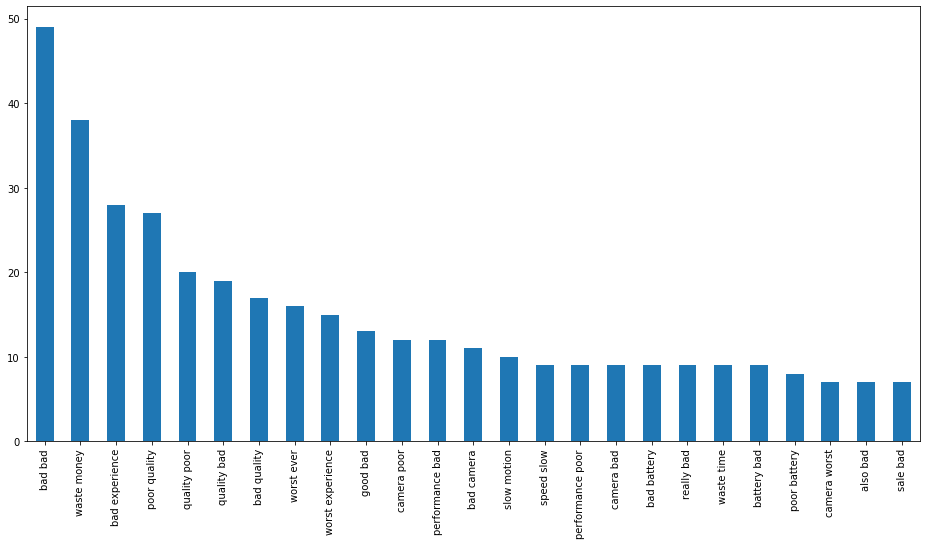

In [142]:
top_25_cutomer_concern_areas.plot(kind = 'bar', figsize = (16,8))